In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

### Reaction rates
All values came from [Caughlan](https://ac.els-cdn.com/0092640X88900095/1-s2.0-0092640X88900095-main.pdf?_tid=spdf-27e3214f-37aa-4629-aaa9-17a4130f141c&acdnat=1519621751_dc06dfbb189a47f21e9a03bc78dd10e9) for $T_9 = 0.15$

In [2]:
cs_ta = 1.48e-18
cs_a12 = 4.63e-46
cs_a16 = 1.05e-22

In [3]:
print("{:e}".format(48 / (1e4**2 * 1.48e-18)))

3.243243e+11


In [82]:
sigs = [lambda t,y: helium_usage(t, y, f=fi) for fi in [1, 1.3, 0.7]]

def helium_usage(t, y, f=1):
    X4, X12, X16, X20 = y
    
    rho = 1e4
    T9 = 0.15
    
    Na2_3a = 1.48e-18
    Na_a12 = 3.03e-17 * f
    Na_a16 = 1.05e-22
    
    RHS = [
        -rho**2 / 32 * Na2_3a * X4**3 - rho / 12 * Na_a12 * X4 * X12 - rho / 16 * Na_a16 * X4 * X16,
        rho**2 / 32 * Na2_3a * X4**3 - rho / 4 * Na_a12 * X4 * X12,
        rho / 3 * Na_a12 * X4 * X12 - rho / 4 * Na_a16 * X4 * X16,
        5 * rho / 16 * Na_a16 * X4 * X16
    ]
    
    # Convert from seconds to years
    time_conversion = 60 * 60 * 24 * 365 
    return np.multiply(RHS, time_conversion)


In [83]:
span = (0, 1e5)
t = np.linspace(*span, 50)
res = [solve_ivp(sig, t_span=span, y0=(1, 0, 0, 0), t_eval=t) for sig in sigs]

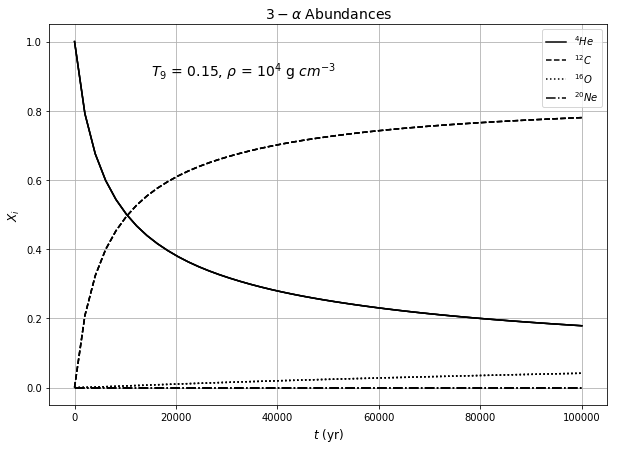

In [84]:
from cycler import cycler

plt.figure(figsize=(10, 7))
cycle = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':', '-.']))
plt.gca().set_prop_cycle(cycle)

plt.title(r'$3-\alpha$ Abundances', fontsize=14)
[[plt.plot(resi.t, y) for y in resi.y] for resi in res]

plt.grid()
plt.xlabel(r'$t$ (yr)', fontsize=12)
plt.ylabel(r'$X_i$', fontsize=12)
labels = [r'$^4He$', r'$^{12}C$', r'$^{16}O$', r'$^{20}Ne$']
plt.legend(labels)

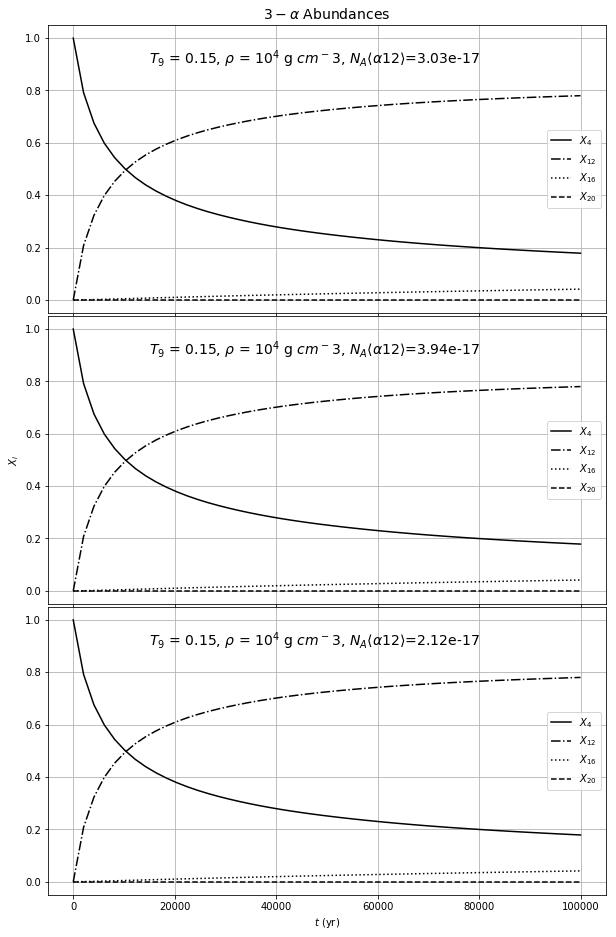

In [92]:
fig, axs = plt.subplots(3, 1, sharex=True)
fig.set_size_inches(10, 16)
axs[0].set_title(r'$3-\alpha$ Abundances', fontsize=14)

labels = [r'$X_4$', r'$X_{12}$', r'$X_{16}$', r'$X_{20}$']
axs[2].set_xlabel(r'$t$ (yr)')


cycle = (cycler('color', ['k']) * cycler('linestyle', ['-', '-.', ':', '--']))

vals = [3.03e-17, 3.03e-17*0.70, 3.03e-17*1.30]
axs[1].set_ylabel(r'$X_i$')
for i, (ax,resi) in enumerate(zip(axs ,res)):
    ax.set_prop_cycle(cycle)
    ax.grid()
    [ax.plot(resi.t, y, label=label) for y, label in zip(resi.y, labels)]
    ax.legend()
    
    
axs[0].annotate(rf'$N_A \langle \alpha 12 \rangle$={3.03e-17:.2e}', (15000,.9), fontsize=14)
axs[1].annotate(rf'$T_9$ = 0.15, $\rho$ = $10^4$ g $cm^{-3}$, $N_A \langle \alpha 12 \rangle$={3.03e-17*1.3:.2e}', (15000,.9), fontsize=14)
axs[2].annotate(rf'$T_9$ = 0.15, $\rho$ = $10^4$ g $cm^{-3}$, $N_A \langle \alpha 12 \rangle$={3.03e-17*0.7:.2e}', (15000,.9), fontsize=14)
plt.subplots_adjust(hspace=0.01)